In [0]:
import numpy as np
import csv
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.pyplot as mlp
import pandas as pd
from pandas import DataFrame
from sqlalchemy import create_engine

In [2]:
spotify_ML = pd.read_csv("patrick_spotify_list.csv")
# spotify_song_list = spotify_ML[spotify_ML['song_popularity']>89]
spotify_ML.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
0,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - By The Way
1,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724,Infest,00s Rock Anthems,Papa Roach - Last Resort
2,81,269000,0.017900,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - Can't Stop
3,71,227240,0.001360,0.659,0.778,0.000007,11,0.0841,-6.423,1,0.0379,110.022,4,0.623,blink-182,00s Rock Anthems,blink-182 - I Miss You
4,62,256600,0.007010,0.370,0.944,0.000003,1,0.1350,-4.979,0,0.0767,130.315,4,0.345,Best Of You,00s Rock Anthems,Foo Fighters - Best of You


In [9]:
songs1 = spotify_ML.drop(['playlist','song_popularity','song_duration_ms',
                          'energy','instrumentalness','key','audio_mode','tempo','time_signature',
                          'audio_valence', 'album_names', 'Artist_and_Track_Name'], axis=1)
 
songs1.head()

,acousticness,danceability,liveness,loudness,speechiness
0,0.026400,0.451,0.1020,-4.938,0.1070
1,0.000504,0.581,0.2680,-3.659,0.0624
2,0.017900,0.618,0.1670,-3.442,0.0456
3,0.001360,0.659,0.0841,-6.423,0.0379
4,0.007010,0.370,0.1350,-4.979,0.0767


In [10]:
songs1.describe()

,acousticness,danceability,liveness,loudness,speechiness
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,0.170845,0.675608,0.190844,-6.391571,0.124985
std,0.214172,0.154222,0.153067,2.571563,0.111489
min,0.000004,0.130000,0.021500,-26.401000,0.023600
25%,0.019200,0.571500,0.094700,-7.832000,0.043400
50%,0.077600,0.686000,0.127000,-5.942000,0.071300
75%,0.246500,0.791000,0.249000,-4.541500,0.186500
max,0.994000,0.980000,0.922000,-0.737000,0.826000


In [0]:
from sklearn import preprocessing
loudness = songs1[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs1['loudness'] = pd.DataFrame(loudness_scaled)

In [0]:
songs_features = songs1.copy()

In [0]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [14]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
  

For n_clusters = 2, silhouette score is 0.39316588871783087)
For n_clusters = 3, silhouette score is 0.28172583776600174)
For n_clusters = 4, silhouette score is 0.24733000301540856)
For n_clusters = 5, silhouette score is 0.2521030050794095)
For n_clusters = 6, silhouette score is 0.22393478615445997)
For n_clusters = 7, silhouette score is 0.2262702878004187)
For n_clusters = 8, silhouette score is 0.20233114980611577)
For n_clusters = 9, silhouette score is 0.23398639118978837)
For n_clusters = 10, silhouette score is 0.2089017093620341)
For n_clusters = 11, silhouette score is 0.21258939926891945)
For n_clusters = 12, silhouette score is 0.21190411532473044)
For n_clusters = 13, silhouette score is 0.21473696219940044)
For n_clusters = 14, silhouette score is 0.2242385259791761)


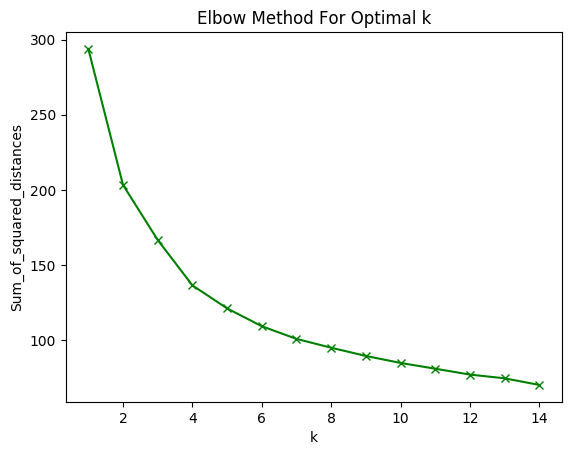

In [15]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

[[0.10852959 0.66586528 0.47098705 0.8094261  0.1403886 ]
 [0.10047043 0.81128511 0.1404466  0.79229507 0.17707085]
 [0.59456154 0.60814615 0.15430462 0.70649788 0.08198949]
 [0.08010368 0.55775212 0.13460411 0.78593552 0.07886771]]


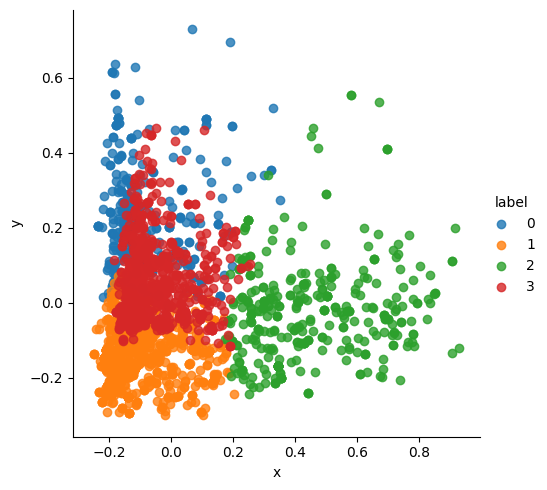

In [18]:
import seaborn as sns

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

centroids = kmeans.cluster_centers_
print(centroids)

In [0]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)


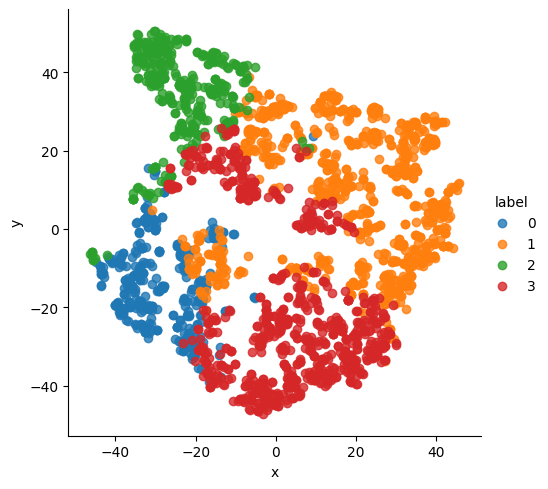

In [20]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [21]:
pca.explained_variance_ratio_

array([0.42370923, 0.22239433])

In [22]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.948639     -0.213998 -0.075219 -0.191782    -0.108857
PC-2     -0.111149     -0.714670  0.677200  0.052747    -0.124538


In [24]:
songs1['label'] = y_kmeans

# shuffle dataset

songs1 = songs1.sample(frac=1)
songs1['label'].value_counts()

1    943
3    825
2    390
0    385
Name: label, dtype: int64

In [41]:
spotify_ML[songs1['label'] == 1].head()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
16,85,223583,0.23500,0.701,0.512,0.000005,0,0.1350,-6.869,0,0.0969,91.947,4,0.663,Real Friends,100% LatinX,Camila Cabello - Real Friends
22,75,202853,0.18100,0.831,0.713,0.000000,1,0.0572,-3.646,0,0.0940,132.109,4,0.690,Sangria Wine,100% LatinX,Pharrell Williams - Sangria Wine
23,38,218448,0.00694,0.799,0.616,0.002370,5,0.2830,-4.599,0,0.0415,127.023,4,0.697,Nice & Slow,100% LatinX,Nina Sky - Nice & Slow
24,84,217288,0.01850,0.704,0.859,0.000000,5,0.0215,-4.877,0,0.0996,105.115,4,0.926,Finesse (Remix) [feat. Cardi B],100% LatinX,Bruno Mars - Finesse (Remix) [feat. Cardi B]
25,74,267266,0.20200,0.891,0.714,0.000234,4,0.0521,-6.055,0,0.1400,100.972,4,0.818,Justified,2000s Smash Hits,Justin Timberlake - Rock Your Body


In [42]:

spotify_ML[songs1['label'] == 0].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
9,11,262733,0.000194,0.582,0.597,0.000273,5,0.517,-5.671,1,0.0512,167.738,4,0.674,ONE BY ONE,00s Rock Anthems,Foo Fighters - All My Life
12,72,256240,0.008340,0.563,0.860,0.010600,8,0.390,-7.533,1,0.0621,97.867,4,0.517,Satellite (U.S. Version WEA Distribution),00s Rock Anthems,P.O.D. - Youth Of The Nation
20,95,253390,0.099000,0.816,0.726,0.000000,5,0.372,-3.998,0,0.1290,136.048,4,0.650,Invasion of Privacy,100% LatinX,Cardi B - I Like It
29,84,218093,0.284000,0.778,0.824,0.000000,10,0.405,-5.892,0,0.0712,100.024,4,0.756,Oral Fixation Vol. 2,2000s Smash Hits,Shakira - Hips Don't Lie
31,78,231240,0.008820,0.613,0.622,0.000000,1,0.370,-5.794,0,0.0334,80.003,4,0.484,Bangerz (Deluxe Version),2000s Smash Hits,Miley Cyrus - We Can't Stop


In [43]:
spotify_ML[songs1['label'] == 2].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
6,79,232533,0.872,0.657,0.291,0.000000,2,0.114,-10.572,1,0.0293,103.973,4,0.298,All That We Needed,00s Rock Anthems,Plain White T's - Hey There Delilah
18,65,209573,0.921,0.471,0.179,0.000000,9,0.101,-10.273,1,0.0890,174.273,4,0.194,Sola,100% LatinX,Jessie Reyez - Sola
21,77,199095,0.398,0.751,0.579,0.000023,2,0.133,-4.036,1,0.0321,105.031,4,0.349,Havana (Remix),100% LatinX,Camila Cabello - Havana - Remix
45,77,288333,0.575,0.624,0.653,0.000000,8,0.104,-6.582,0,0.1760,73.884,4,0.565,Justified,2000s Smash Hits,Justin Timberlake - Cry Me a River
47,74,221360,0.407,0.530,0.422,0.000000,5,0.107,-6.262,1,0.0342,119.964,4,0.349,Bangerz (Deluxe Version),2000s Smash Hits,Miley Cyrus - Wrecking Ball


In [44]:
spotify_ML[songs1['label'] == 3].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,album_names,playlist,Artist_and_Track_Name
0,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - By The Way
1,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724,Infest,00s Rock Anthems,Papa Roach - Last Resort
2,81,269000,0.017900,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,By The Way (Deluxe Version),00s Rock Anthems,Red Hot Chili Peppers - Can't Stop
3,71,227240,0.001360,0.659,0.778,0.000007,11,0.0841,-6.423,1,0.0379,110.022,4,0.623,blink-182,00s Rock Anthems,blink-182 - I Miss You
4,62,256600,0.007010,0.370,0.944,0.000003,1,0.1350,-4.979,0,0.0767,130.315,4,0.345,Best Of You,00s Rock Anthems,Foo Fighters - Best of You


In [0]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
# Confusion matrix
definitions = ['Regret','Loneliness','energetic','feeling young']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))



Confusion matrix, without normalization
[[128   2   0   3]
 [  0 276   2   8]
 [  8   2 125   2]
 [  3  11   2 268]]


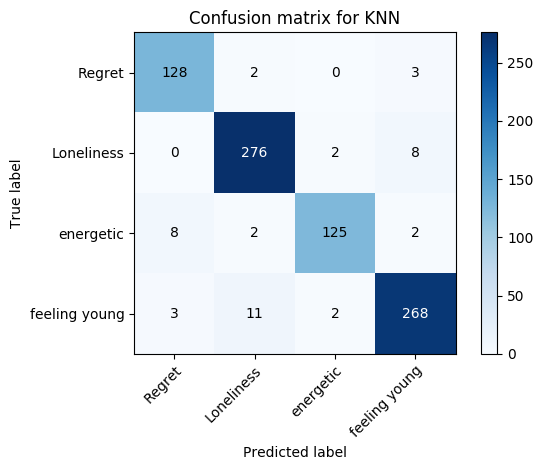

In [74]:
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [75]:
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('acousticness', 0.2706062677415756),
 ('danceability', 0.3585821523866566),
 ('liveness', 0.25523803608613654),
 ('loudness', 0.03322467930928779),
 ('speechiness', 0.08234886447634343)]

In [76]:

print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

               precision    recall  f1-score   support

       Regret       0.92      0.96      0.94       133
   Loneliness       0.95      0.97      0.96       286
    energetic       0.97      0.91      0.94       137
feeling young       0.95      0.94      0.95       284

     accuracy                           0.95       840
    macro avg       0.95      0.95      0.95       840
 weighted avg       0.95      0.95      0.95       840
KNN
